In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model # 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten #
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop #

from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence,tokenizer_from_json

In [ ]:
dataset = pd.read_csv('F:/datasets/Food_Delivery_Times.csv').fillna(0)

fixed_df = dataset.drop(dataset.columns[0],axis = 1)

fixed_df

In [ ]:
x_train,y_train = dataset.iloc[:, 1:-1].values, dataset.iloc[:,-1:].values
print(x_train[0])
print(y_train[0])

x2_train = dataset.iloc[:, 1:].values
print(x2_train[0])

In [ ]:
def delivery_time(val):
    return val/100


def distance_km(val):
    return val/100

def preparation_time(val):
    return val/100

def experiance(val):
        return val/10

def weather(i):
    if i=='Clear':
        return [1,0,0,0,0]
    elif i=='Windy':
        return [0,1,0,0,0]
    elif i=='Rainy':
        return [0,0,1,0,0]
    elif i=='Foggy':
        return [0,0,0,1,0]
    elif i=='Snowy':
        return [0,0,0,0,1]
    else:
        return [0,0,0,0,0]
            
def traffic(t):
    if t=='Low':
        return [1,0,0]
    elif t=='Medium':
        return [0,1,0]
    elif t=='High':
        return [0,0,1]
    else:
        return [0,0,0]

def day_phase(d):
    if d=='Morning':
        return [1,0,0,0]
    elif d=='Afternoon':
        return [0,1,0,0]
    elif d=='Evening':
        return [0,0,1,0]
    elif d=='Night':
        return [0,0,0,1]
    else:
        return [0,0,0,0]

def transport(trans):
    if trans=='Scooter':
        return [1,0,0]
    elif trans=='Bike':
        return [0,1,0]
    elif trans=='Car':
        return [0,0,1]
    else:
        return [0,0,0]

def getAllParameters(val):
    distance = distance_km(val[0])
    pr_time = preparation_time(val[5])
    exp = experiance(val[6])
    wet = weather(val[1])
    traf = traffic(val[2])
    day = day_phase(val[3])
    vehicle = transport(val[4])
    out = []

    out.append(distance)
    out.append(pr_time)
    out.append(exp)
    out+=wet
    out+=traf
    out+=day
    out+=vehicle
    print(out)
    return out


def xy_data(x_train):
    x1_train=[]
    y_train=[]

    for i in x_train:
        print(i)
        y = delivery_time(i[7])
        
        x = getAllParameters(i)
        x1_train.append(x)
        y_train.append(y)
            
    x2_train = np.array(x1_train)
    y_train = np.array(y_train)

    return (x2_train, y_train)


In [ ]:
(x1_train, y_train) = xy_data(x2_train)
y_train

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1_train, y_train, random_state=0)
x1_train.shape,y_train.shape

In [ ]:

model = LinearRegression()
model.fit(X1_train,y1_train)
model_pred = model.predict(X1_test)
model_score = r2_score(y1_test,model_pred)
model_mape=mean_absolute_percentage_error(y1_test, model_pred)

print(f'model score r2:{model_score}')
print(f'model mape:{model_mape}')


In [ ]:
#кросс валидация
model = LinearRegression()

scores = cross_val_score(model, X1_train, y1_train, cv=20, scoring='r2')

print(f'Оценки R² на каждом фолде: {scores}')
print(f'Среднее значение R²: {scores.sum()/len(scores)}')

In [ ]:
y1_test.shape

In [ ]:
model = LinearRegression()
model.fit(X1_train,y1_train)
pred = model.predict(X1_test)
plt.scatter(y1_test,pred)
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot(X1_test,X1_test)
plt.plot(pred,pred)
plt.show()

In [ ]:
x1_train = x1_train.astype('float64')
y_train = y_train.astype('float64')
from sklearn.preprocessing import StandardScaler #
yScaler = StandardScaler()

# Скармливаем объекту двумерный вектор
yScaler.fit(y_train.reshape(-1, 1))

# Нормализуем по нормальному распределению
yTrainScaled = yScaler.transform(y_train.reshape(-1,1))

In [ ]:

# Обучаем модель стандартизированными данными
model = Sequential()
model.add(Dense(100,activation='linear'))
model.add(Dense(1000,activation='tanh'))
model.add(Dense(100,activation='linear'))
model.add(Dense(1,activation='relu'))

model.compile( loss='mse', metrics=['accuracy'])


history = model.fit(X1_train
                    ,y1_train,
                    epochs=10,                    
                     validation_split=0.10)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [70]:

# Обучаем модель стандартизированными данными
model = Sequential()
model.add(Dense(100,activation='linear'))
model.add(Dense(1000,activation='tanh'))
model.add(Dense(100,activation='linear'))
model.add(Dense(1,activation='relu'))

model.compile( loss='mse', metrics=['accuracy'])


history = model.fit(X1_train
                    ,y1_train,
                    epochs=10,                    
                     validation_split=0.10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.5211 - val_accuracy: 0.0000e+00 - val_loss: 0.3838
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 4.8838e-04 - loss: 0.3395 - val_accuracy: 0.0000e+00 - val_loss: 0.6318
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.3305 - val_accuracy: 0.0000e+00 - val_loss: 0.3342
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0016 - loss: 0.1204 - val_accuracy: 0.0000e+00 - val_loss: 0.1992
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0026 - loss: 0.1056 - val_accuracy: 0.0000e+00 - val_loss: 0.2032
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0025 - loss: 0.0894 - val_accuracy: 0.0000e+00 - val_loss: 0.2008
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0018 - loss: 0.0828 - val_accuracy: 0.0000e+00 - val_loss: 0.0836
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0048 - loss: 

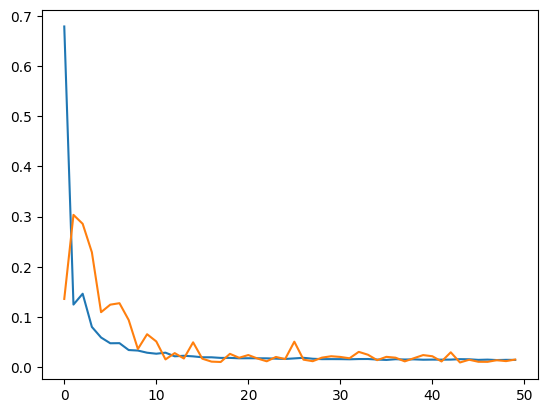

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()